In [64]:
import pandas as pd
from tensorflow import keras
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from tslearn.clustering import KShape
import numpy as np
from sklearn import tree

In [65]:
Restriction = '3-SD'
numberOfFeatures2 = numberOfWindows = 187
ep = 175
ep_es = 25

In [66]:
FeatureSetB1 = pd.read_csv('Windows/mitbih_187Ws.csv')
FeatureSetB1.drop("Unnamed: 0",axis=1,inplace = True)
FeatureSetB1 = FeatureSetB1.drop('index', axis=1)
tree = tree.DecisionTreeClassifier()

In [67]:
FeatureSetB2 = FeatureSetB1.sample(frac=1)

In [68]:
import pandas as pd
import numpy as np

B_class_0 = FeatureSetB2[FeatureSetB2['Class'] == 0]
B_class_1 = FeatureSetB2[FeatureSetB2['Class'] == 1]
B_class_2 = FeatureSetB2[FeatureSetB2['Class'] == 2]
B_class_3 = FeatureSetB2[FeatureSetB2['Class'] == 3]
B_class_4 = FeatureSetB2[FeatureSetB2['Class'] == 4]


# Calculate the Z-scores for each feature
z_score_0 = (B_class_0 - B_class_0.mean()) / B_class_0.std()
z_score_1 = (B_class_1 - B_class_1.mean()) / B_class_1.std()
z_score_2 = (B_class_2 - B_class_2.mean()) / B_class_2.std()
z_score_3 = (B_class_3 - B_class_3.mean()) / B_class_3.std()
z_score_4 = (B_class_4 - B_class_4.mean()) / B_class_4.std()

# Set a threshold for the Z-score
threshold_0 = 2
threshold_1 = 2.75
threshold_2 = 2.75
threshold_3 = 2.75
threshold_4 = 2.75

# Identify the outliers based on the threshold
outliers_0 = np.abs(z_score_0) > threshold_0
outliers_1 = np.abs(z_score_1) > threshold_1
outliers_2 = np.abs(z_score_2) > threshold_2
outliers_3 = np.abs(z_score_3) > threshold_3
outliers_4 = np.abs(z_score_4) > threshold_4

# Remove the outliers from the dataset
B_class_0 = B_class_0[~outliers_0.any(axis=1)]
B_class_1 = B_class_1[~outliers_1.any(axis=1)]
B_class_2 = B_class_2[~outliers_2.any(axis=1)]
B_class_3 = B_class_3[~outliers_3.any(axis=1)]
B_class_4 = B_class_4[~outliers_4.any(axis=1)]

# Split the dataset into two classes and perform clustering as described in the previous answer
merged_df = pd.concat([B_class_0,B_class_1,B_class_2,B_class_3,B_class_4])
merged_df = merged_df.sample(frac=1)

In [69]:
X = FeatureSetB2.iloc[:, :-2]
y = FeatureSetB2[['Class']]

In [70]:
# Calculate the number of samples in the majority class
sampling_strategy = {1: 20000, 2: 20000, 3: 20000, 4:20000}

ros = RandomOverSampler(sampling_strategy=sampling_strategy)
ros2 = RandomUnderSampler(sampling_strategy= {0:40000})

# X,y = ros.fit_resample(X,y)
# x,y = ros2.fit_resample(X,y)

In [71]:
X_train1, X_test, y_train1, y_test = train_test_split(X,y, test_size=0.2, random_state=1, stratify=y, shuffle=True)

X_train1,y_train1 = ros.fit_resample(X_train1,y_train1)
x,y = ros2.fit_resample(X_train1,y_train1)

X_train2, X_val, y_train2, y_val = train_test_split(x,y, test_size=0.2, random_state=1, stratify=y, shuffle=True)


Rye - Artificial Neural Network 

In [72]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout,Flatten, Activation
from sklearn import metrics
from keras.layers import LSTM
import tensorflow as tf
import sys
mod=sys.modules[__name__]

In [73]:
import numpy as np
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score
from tensorflow.keras.utils import to_categorical
from sklearn import preprocessing
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Dense, MaxPooling1D, Flatten
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import BatchNormalization
from sklearn.utils import class_weight

import warnings
warnings.filterwarnings("ignore")

from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import class_weight

stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience = ep_es, mode='min',restore_best_weights=True)

acc_score = []
re_score = []
pre_score = []
history_1 = []
f_score = []
auroc_score = []
auprc_score = []

In [74]:
numberOfFeatures=1

model = Sequential()
model.add(LSTM(128, input_shape=(numberOfWindows,numberOfFeatures)))#,return_sequences=True))
#model.add(Dropout(0.25))
model.add(Dense(64, activation='relu'))
#model.add(Dropout(0.25))
#model.add(Dense(32,activation='relu'))#, activation='relu'))
#model.add(Dropout(0.1))
model.add(Dense(5, activation='softmax'))
model.summary()
opt = tf.keras.optimizers.Adam(learning_rate=0.0045)#, decay=1e-3) #If validation is not following training in trend then the learning rate might be too high
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])#focal_loss_custom(alpha=0.2, gamma=2) #'binary_crossentropy'#focal_loss_custom(alpha=0.25, gamma=2)


#scaler = preprocessing.StandardScaler().fit(X_train)
#scaler = preprocessing.RobustScaler().fit(X_train)
#scaler =  preprocessing.MinMaxScaler().fit(X_train)
scaler = preprocessing.Normalizer().fit(X_train2)

X_train4 = scaler.transform(X_train2)
X_test4 = scaler.transform(X_test)
X_val4 = scaler.transform(X_val)

Train_shape = X_train4.shape
X_train4 = X_train4.reshape(int(Train_shape[0]),numberOfWindows,1)

Train_shape = X_test4.shape
X_test4 = X_test4.reshape(int(Train_shape[0]),numberOfWindows,1)

Train_shape = X_val4.shape
X_val4 = X_val4.reshape(int(Train_shape[0]),numberOfWindows,1)


y_train2 = to_categorical(y_train2)
y_test = to_categorical(y_test)
y_val = to_categorical(y_val)


history = model.fit(X_train4,y_train2, epochs = ep,batch_size=1024,validation_data=(X_val4, y_val), callbacks=[stop_early],shuffle=True)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 128)               66560     
                                                                 
 dense_6 (Dense)             (None, 64)                8256      
                                                                 
 dense_7 (Dense)             (None, 5)                 325       
                                                                 
Total params: 75,141
Trainable params: 75,141
Non-trainable params: 0
_________________________________________________________________
Epoch 1/175


2023-04-03 17:07:45.456439: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-04-03 17:07:45.686585: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-04-03 17:07:46.374295: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


94/94 [==============================] - ETA: 0s - loss: 1.5821 - accuracy: 0.3317

2023-04-03 17:08:03.062149: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-04-03 17:08:03.144540: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


94/94 [==============================] - 22s 201ms/step - loss: 1.5821 - accuracy: 0.3317 - val_loss: 1.5607 - val_accuracy: 0.3333
Epoch 2/175
94/94 [==============================] - 17s 178ms/step - loss: 1.5614 - accuracy: 0.3333 - val_loss: 1.5607 - val_accuracy: 0.3333
Epoch 3/175
94/94 [==============================] - 16s 168ms/step - loss: 1.5610 - accuracy: 0.3333 - val_loss: 1.5615 - val_accuracy: 0.3333
Epoch 4/175
94/94 [==============================] - 16s 166ms/step - loss: 1.5609 - accuracy: 0.3333 - val_loss: 1.5607 - val_accuracy: 0.3333
Epoch 5/175
94/94 [==============================] - 16s 171ms/step - loss: 1.5602 - accuracy: 0.3333 - val_loss: 1.5599 - val_accuracy: 0.3333
Epoch 6/175
94/94 [==============================] - 16s 167ms/step - loss: 1.5617 - accuracy: 0.3335 - val_loss: 1.5606 - val_accuracy: 0.3333
Epoch 7/175
94/94 [==============================] - 16s 171ms/step - loss: 1.5597 - accuracy: 0.3333 - val_loss: 1.5585 - val_accuracy: 0.3333
Epoc

In [75]:
# Make predictions on test data
y_pred = model.predict(X_test4)

# Convert probabilities to one-hot encoded vectors
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

2023-04-03 17:22:49.259738: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-04-03 17:22:49.342950: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [76]:
# Calculate F1 score macro and Precision macro
f1_value = f1_score(y_test_classes, y_pred_classes, average='macro')
precision = precision_score(y_test_classes, y_pred_classes, average='macro')
sensitivity = recall_score(y_test_classes, y_pred_classes,average='macro')#,pos_label = 1, average='binary')
accuracy = accuracy_score(y_test_classes, y_pred_classes)

acc_score.append(accuracy)
re_score.append(sensitivity)
pre_score.append(precision)
f_score.append(f1_value)

k = 1 

avg_acc_score = sum(acc_score)/k
avg_recall_score = sum(re_score)/k
avg_precision_score = sum(pre_score)/k
avg_f1_score = sum(f_score)/k

sensitivity = avg_recall_score
precision = avg_precision_score
accuracy = avg_acc_score
f1_score = avg_f1_score


In [77]:
#print('accuracy of each fold - {}'.format(acc_score))
print('Avg accuracy : {}'.format(avg_acc_score))
#print('Recall of each fold - {}'.format(re_score))
print('Avg Reccall : {}'.format(avg_recall_score))
#print('Precision of each fold - {}'.format(pre_score))
print('Avg Precision : {}'.format(avg_precision_score))
#print('F1_Score of each fold - {}'.format(f_score))
print('Avg F1_score : {}'.format(avg_f1_score))

Avg accuracy : 0.007355292612727854
Avg Reccall : 0.2
Avg Precision : 0.0014710585225455707
Avg F1_score : 0.0029206349206349204


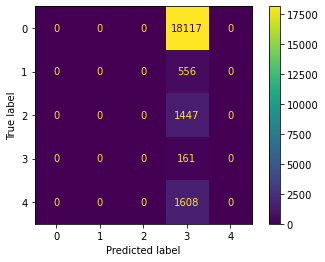

array([0., 0., 0., 1., 0.])

In [78]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
matrix = matrix2 = confusion_matrix(y_test_classes, y_pred_classes)
cm_display = ConfusionMatrixDisplay(confusion_matrix = matrix2)
cm_display.plot()
plt.show()
matrix.diagonal()/matrix.sum(axis=1)

In [79]:
Accuracies = matrix.diagonal()/matrix.sum(axis=1)

Less3 = Accuracies[0]
Greater3 = Accuracies[1]

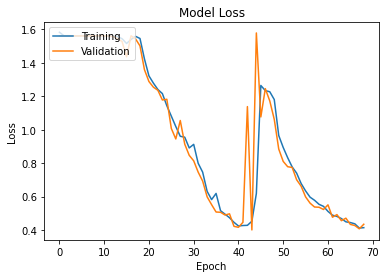

In [80]:
# Plot the accuracy of the model during training

#plt.plot()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper left')
plt.show()

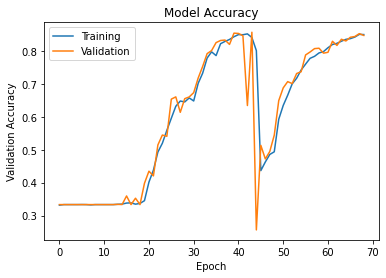

In [81]:
# Plot the accuracy of the model during training

#plt.plot()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Validation Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper left')
plt.show()

In [82]:
Accuracies = matrix.diagonal()/matrix.sum(axis=1)

accuracy = (Greater3+Less3)/2

In [83]:
import csv
import os.path
from datetime import datetime

csv_columns = ['model-type','precision','sensitivity','f1-score','accuracy','NumberOfWindows','Epochs','Run_Time','Restriction','Acc_Lesser','Acc_Greater']
dict_data = [{'model-type':'LSTM', 'precision': precision,'sensitivity': sensitivity,'f1-score': f1_score,'accuracy': accuracy,'NumberOfWindows':numberOfWindows,"Epochs":ep,'Restriction' : Restriction,'Acc_Lesser':Less3,'Acc_Greater':Greater3}]
metric_file = "Results_Apr3/mitbih_LSTM_1.csv"

file_exists = os.path.isfile(metric_file)
try:
    with open(metric_file, 'a') as csvfile:
        writer = csv.DictWriter(csvfile, fieldnames=csv_columns)
        if not file_exists:
            writer.writeheader()
        for data in dict_data:
            writer.writerow(data)
except IOError:
    print("I/O error")